#### imports 

In [1]:
from collections import Counter
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#  Final assignment - Supervised learning DS3
### Assignment for supervised learning (part of DS3)
#### Author:   Henrike Vaartstra
#### Date:       6-4-2021

## Data description

The data used in this assignment is the 'Mushrooms' data set from archive.ics.uci.edu. The set can be found here https://archive.ics.uci.edu/ml/datasets/mushroom. The main purpose of this dataset is classifying poisonous and edible mushrooms on the basis of physical appearances.

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ''leaflets three, let it be'' for Poisonous Oak and Ivy.

The data consists of:
- <i>agaricus-lepiota.data</i>: the observations itself
- <i>agaricus-lepiota.names</i>: the description of the observations

Besides the data itself, I did some research into mushrooms and being poisonous. From this I found 'common traits of poisonous mushroom':
- bruises + gill color red
- gill color white 
- Ring around the stem
- Parasol/umbrella shaped cap
- Spore print color white

source: https://tinyurl.com/4hs5rpmz

## Data preperation

In [2]:
"""
Reading and transforming the data
"""
# The observations
mushrooms = pd.read_table('data/agaricus-lepiota.data', sep=',')

# set all features
features = ['p','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size',
            'gill-color', 'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
            'stalk-color-above-ring', 'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
            'spore-print-color','population','habitat']

# replace all columns with the description for readability
mushrooms.columns = features

# The observations descriptions
description = pd.read_table('data/agaricus-lepiota.names', error_bad_lines=False, warn_bad_lines=False)
description = description.iloc[29:64].reset_index().drop(['index'], axis=1)

# show all descriptions for the features
description

,1. Title: Mushroom Database
0,"7. Attribute Information: (classes: edible=e, poisonous=p)"
1,"1. cap-shape: bell=b,conical=c,convex=x,flat=f,"
2,"knobbed=k,sunken=s"
3,"2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s"
4,"3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,"
5,"pink=p,purple=u,red=e,white=w,yellow=y"
6,"4. bruises?: bruises=t,no=f"
7,"5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,"
8,"musty=m,none=n,pungent=p,spicy=s"
9,"6. gill-attachment: attached=a,descending=d,free=f,notched=n"


In [3]:
"""
The observations:
Every column is a specific physical appearance for which different classes have been made in the 'names' file. 
The names file can be found in the 'description' dataframe, here all the descriptions are explained and what they mean.
Veil-type can be dropped because this data only contains mushrooms with veil-type Partial and thus this is not
a factor we need to consider.
"""
mushrooms = mushrooms.drop(['veil-type'], axis=1)
mushrooms.head()

,p,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,s,w,w,w,o,p,k,n,g


In [4]:
"""
Label encoding:
The data consists of string (charachter/letters) data. To be able to visualize and work with the data, it is better that
it is encoded into integers. This makes counting and thus plotting easier. 
"""
def label_encoding(df):
    """
    Parameters: 
    - df    dataframe to be encoded
    
    Returns:
    - df    encoded dataframe
    """
    for column in df.columns:
            df[column] = df[column].astype('category').cat.codes
    return df

label_encoding(mushrooms)
mushrooms.head()

,p,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1


In [5]:
"""
Columns to one-hot-encoding:
The column 'p' consists of 1 for poisonous and 0 for edible. This is 1 column in the original dataframe. For the purpose
of classifying which physhical appearance are related to a poisonous mushroom, I dicided to one-hot-encode the column
'p'to seperate it into two columns for 'edible' and 'poisonous'
"""
def dummies():
    # get_dummies to one-hot-encode the 'p' column into two seperate columns. Also rename for clearity.
    edible_poisonous = pd.get_dummies(mushrooms['p']).rename({0:'edible', 1:'poisonous'}, axis=1)

    # Combine the two seperate columns for edible/poisonous with the original dataframe and drop the
    # original column 'p' from which the new columns emerged.
    hot_mushrooms = pd.concat([edible_poisonous, mushrooms], axis=1).drop(['p'], axis=1)

    return hot_mushrooms

mushrooms = dummies()
mushrooms.head()

,edible,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,5,2,9,1,0,1,0,0,...,2,2,7,7,2,1,4,3,2,1
1,1,0,0,2,8,1,3,1,0,0,...,2,2,7,7,2,1,4,3,2,3
2,0,1,5,3,8,1,6,1,0,1,...,2,2,7,7,2,1,4,2,3,5
3,1,0,5,2,3,0,5,1,1,0,...,2,2,7,7,2,1,0,3,0,1
4,1,0,5,3,9,1,0,1,0,0,...,2,2,7,7,2,1,4,2,2,1


#### Data exploration

In [6]:
"""
To get a general idea of the data, several properties are analyzed in the following step.
1. Shape
2. Check for missing values
3. See how many poisonous mushrooms there are
4. See how many features there are
"""
# get the general shape of the dataframe
print(f'General data shape {mushrooms.shape}')
print('')

# check for nan values
print(f'Number of null values {mushrooms.isnull().sum().sum()}')
print('')

# check for how many poisonous mushrooms there are; the data seems to be equally distributed
print(f'Poisonous(1) vs edible(0) {mushrooms.groupby("poisonous").size()}')
print('')

# first two columns are labels; check how many features
print(f'Number of features {len(mushrooms.columns[2:])}')

General data shape (8123, 23)

Number of null values 0

Poisonous(1) vs edible(0) poisonous
0    4208
1    3915
dtype: int64

Number of features 21


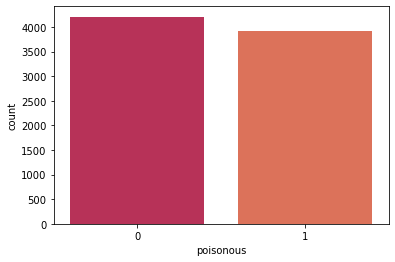

In [33]:
# The data seems to be equally distributed over the poisonous and edible mushrooms
count = sns.countplot(x=mushrooms['poisonous'], label= 'Count',  palette=['#CD1C4E', '#F16445'])

In [7]:
"""
Describe:
To further dive into the data I used the describe function to see how the features were lying in the space in order
to check of scaling would be necessary. The data seems to be binary but also sometimes on larger scales (0-9), therefor
I choose to normalize (this will be done later on).
"""
mushrooms.describe()

,edible,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,0.518035,0.481965,3.347901,1.827650,4.504740,0.415487,4.144528,0.974147,0.161517,0.309122,...,1.575034,1.603595,5.816201,5.794534,1.965530,1.069432,2.291764,3.596947,3.644097,1.508187
std,0.499705,0.499705,1.604323,1.229947,2.545972,0.492836,2.103758,0.158705,0.368030,0.462160,...,0.621480,0.676001,1.901819,1.907362,0.242684,0.271080,1.801683,2.382744,1.252139,1.719645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


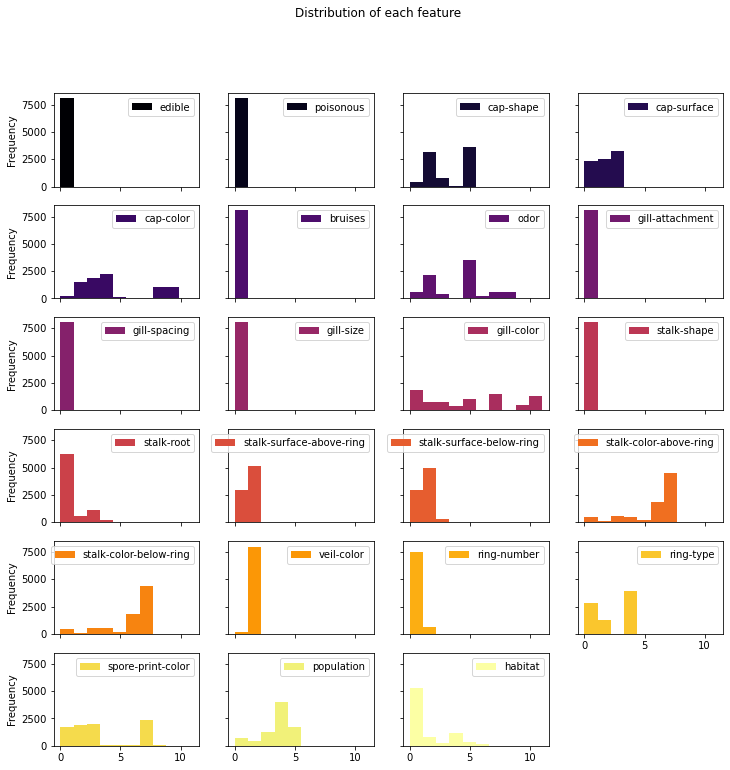

In [8]:
"""
To get a better idea of how the data is distributed; all columns are plotted in the following histograms.
There is not much to say about this data; you cannot pinpoint one feature that is normally distributed or
something else.
"""
mushrooms.plot(kind='hist', subplots=True, layout=(6,4), sharex=True, sharey=True, figsize=(12,12), 
               title='Distribution of each feature', cmap='inferno')
plt.show()

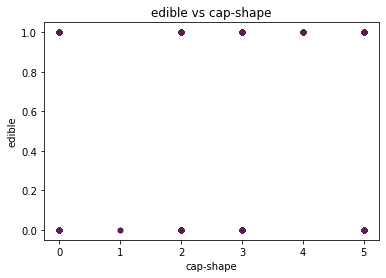

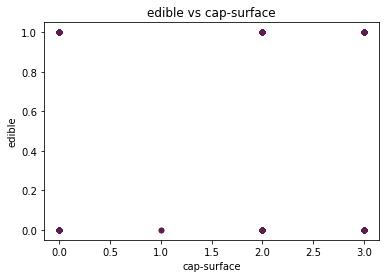

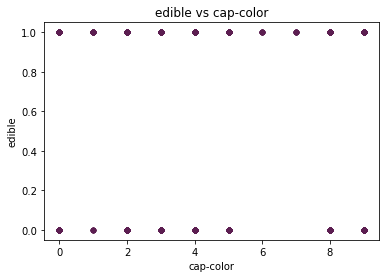

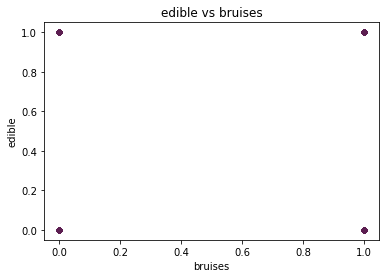

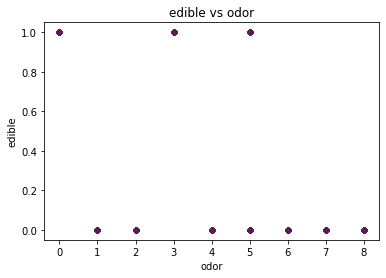

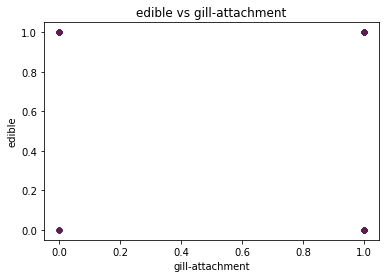

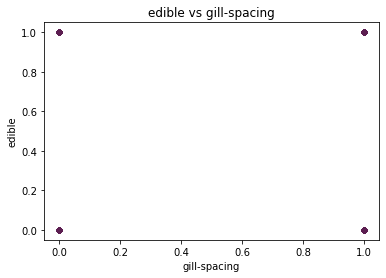

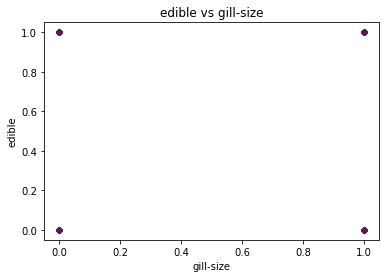

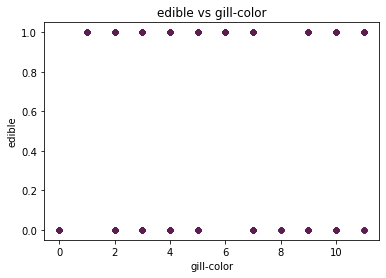

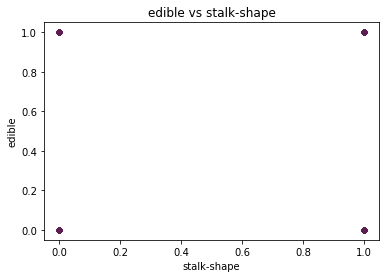

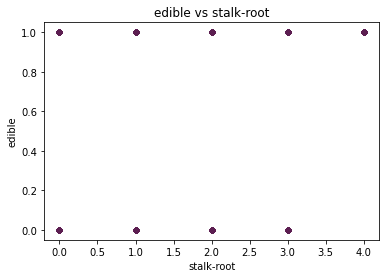

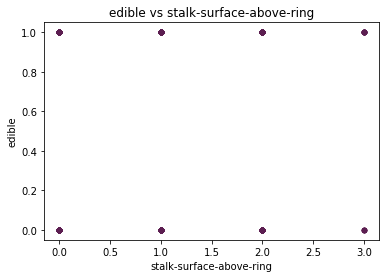

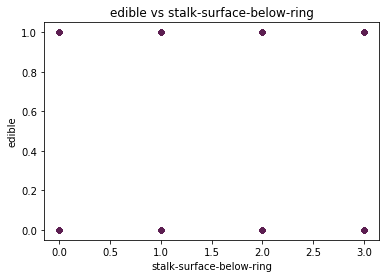

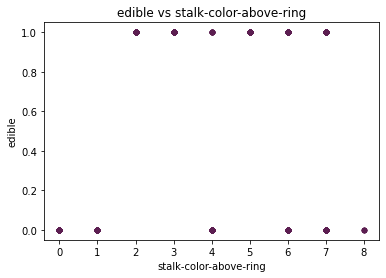

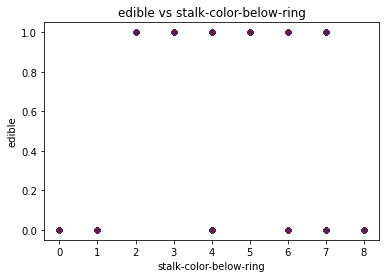

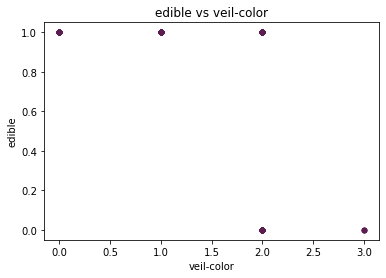

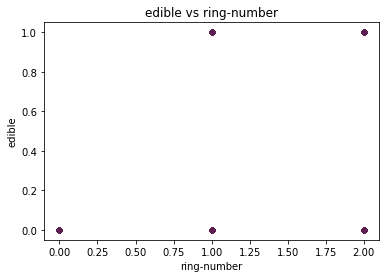

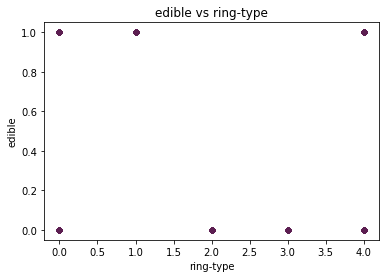

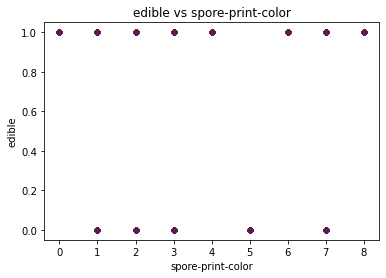

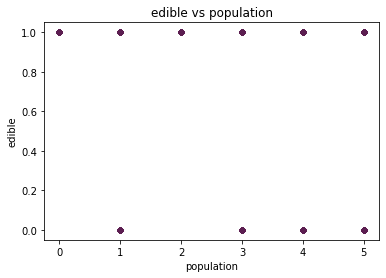

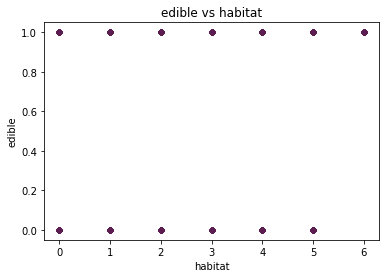

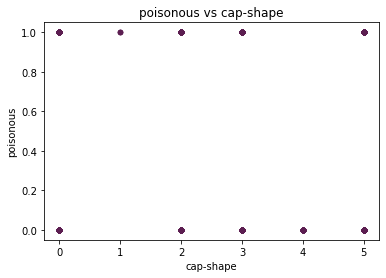

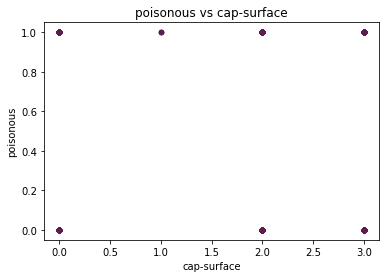

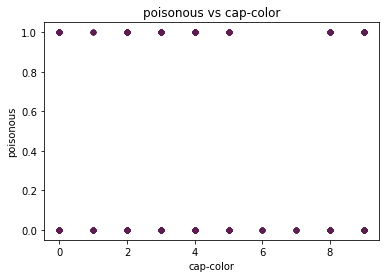

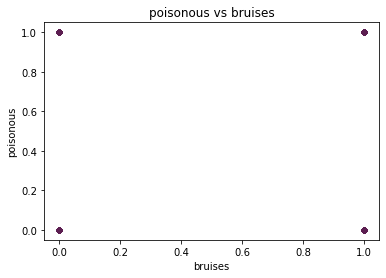

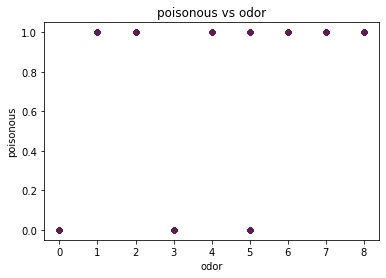

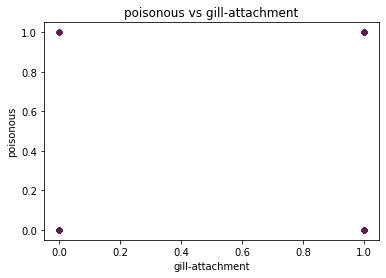

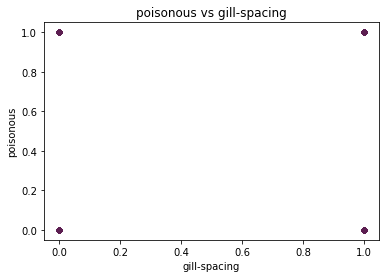

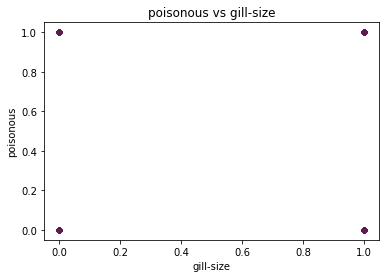

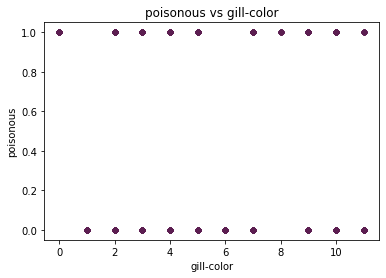

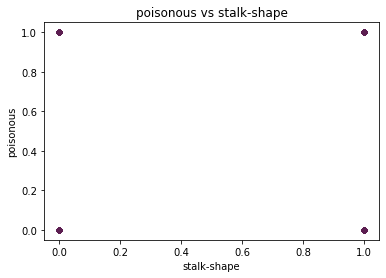

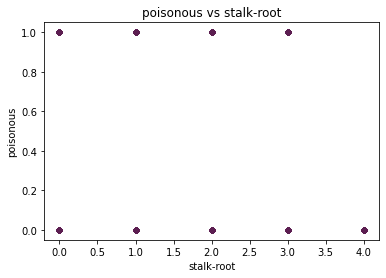

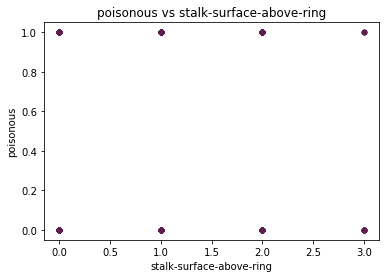

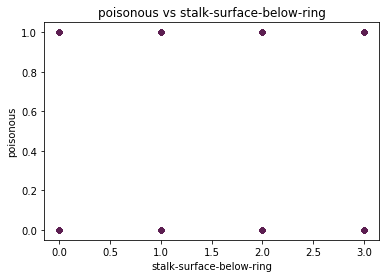

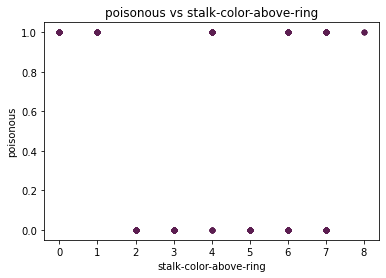

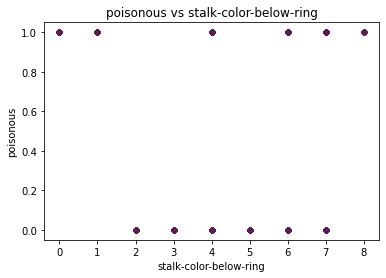

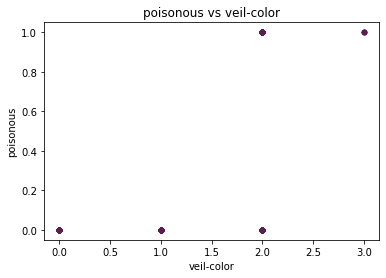

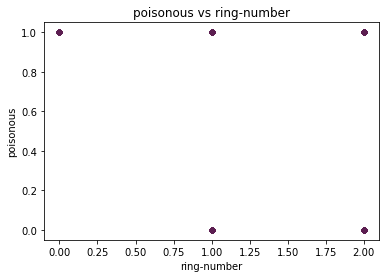

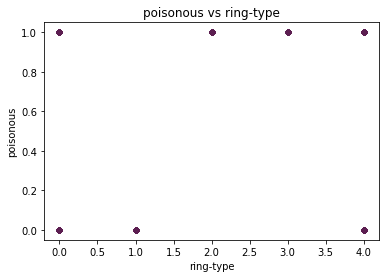

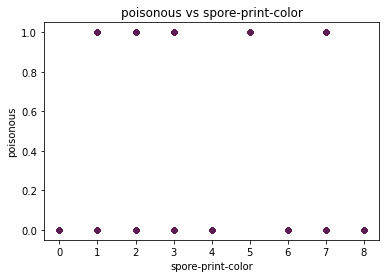

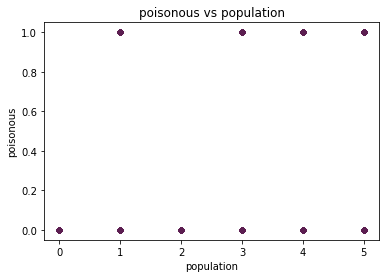

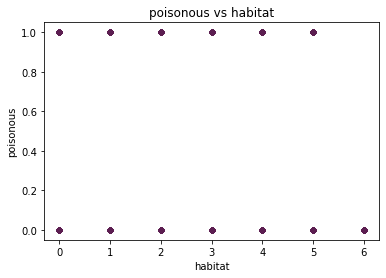

In [9]:
"""
Correlation:
To get first insights into the correlation of certain features, I dicided to create scatterplots for all the columns
against the labels. There is no label that seems to have (high) correlation with any of the features. The scatterplot
does not give any clear information. Therefore I chose to do a heatmap instead.
"""
def scatter_plot():
    # features for the xs axis
    xs = mushrooms.columns[2:]
    # labels to be predicted (edible or poisoness) for the ys axis
    ys = mushrooms.columns[:2]

    # loop over the ys and xs to create scatterplots for all columns
    for y in ys:
        for x in xs: 
            mushrooms.plot.scatter(x=x, y=y, title=f'{y} vs {x}', color='#5C1E51')
            
scatter_plot()

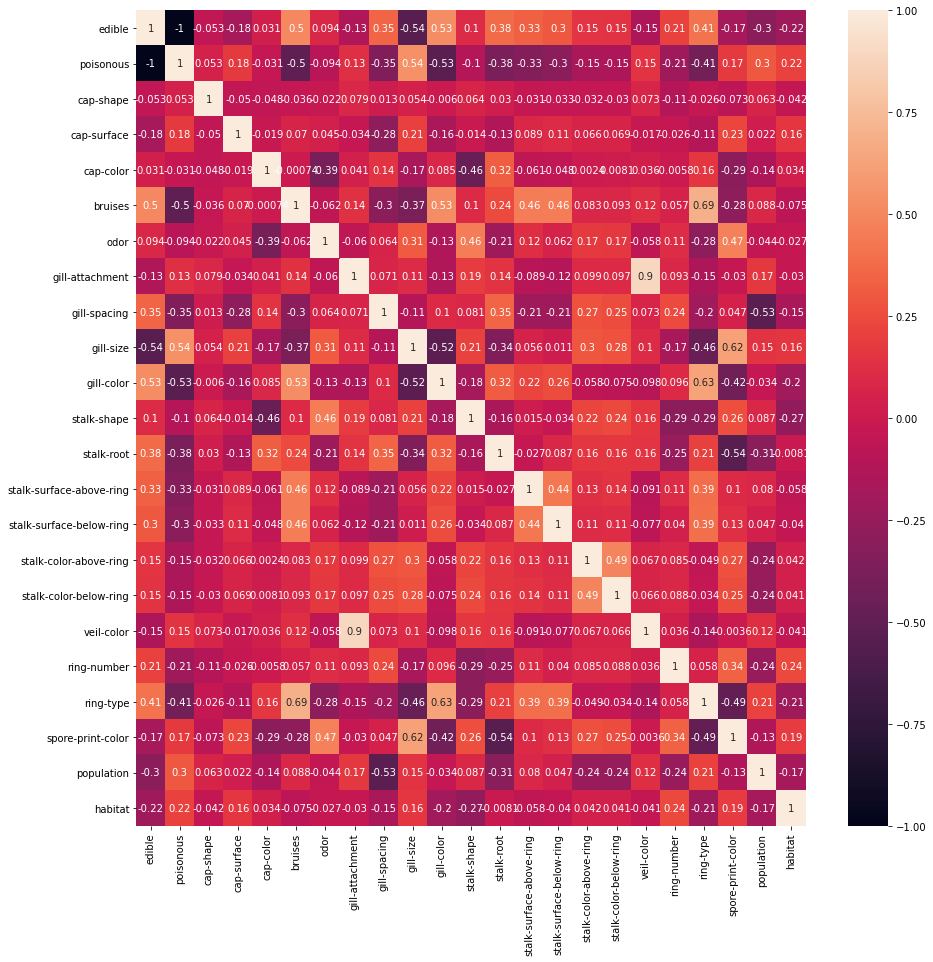

In [10]:
"""
Below, the heatmap of the data is shown. This indicates which features correlate with each other and which are correlating
with the labels. For the purpose of being more precise and clear (and to not write down a whole book) I will only depict 
the ones that have a correlation of 0.60 or higher.

Gill attatchment: A lamella, or gill, is a papery hymenophore rib under the cap of some mushroom species, 
most often but not always agarics. The gills are used by the mushrooms as a means of spore dispersal, and are 
important for species identification (https://tinyurl.com/d8afcyj4). 

Gill color: The color of the gill (explained above). Mushrooms with white gills are often poisonous. 
So are those with a ring around the stem and those with a volva. Because the volva is often underground, 
it's important to dig around the base of a mushroom to look for it.Mushrooms with a red color on the cap or stem 
are also either poisonous or strongly hallucinogenic (https://tinyurl.com/bf6ky47u).

Gill size: The size of the gill (explained above). 

Veil color: In the immature fruit bodies of some basidiomycete fungi, the partial veil extends from the stem surface 
to the cap margin and shields the gills during development, and later breaks to expose the mature gills. The presence, 
absence, or structure of the partial veil is an aid to identification of mushrooms (https://tinyurl.com/wzybezvw).

Ring type: An annulus is the ring-like or collar-like structure sometimes found on the stipe of some species of mushrooms. 
The annulus represents the remaining part of the partial veil, after it has ruptured to expose the gills or other 
spore-producing surface (https://tinyurl.com/yrh8de4a). The presence of a ring around the stem might indicate that
the mushroom is poisonous (https://tinyurl.com/4hs5rpmz).

Spore print color: Mushroom spores are tiny, reproductive cells that allow fungus to replicate and grow. 
A white spore print is one of the common traits of a poisonous mushroom (https://tinyurl.com/4hs5rpmz).

Bruises: The discoloration is due to bruising. It looks like someone pressed a finger into it. Why does this happen? 
The color change is caused by a chemical reaction that occurs when certain compounds in the cell walls of the mushroom 
are exposed to air. It is important to observe if any colour changes occur when you cut into a mushroom – this can be 
incredibly helpful when trying to identify the specific type of mushroom as well as determining whether its 
poisonous or not (https://tinyurl.com/9keysdhc). A common rule for boletes is that you shouldn't eat one that has a 
red pore surface and bruises blue (https://tinyurl.com/utym2kcs). 

Feature 1       | Feature 2         | Correlation | Reasoning
--------------------------------------------------------------------------------------------------------------
Gill attachment | Veil color        | 0.9         | I could not find any 'scientific' proof of the way the gill is 
                |                   |             | attached has any correlation with being poisonous but in general 
                |                   |             | color is a good indication if a mushroom is edible or not.
--------------------------------------------------------------------------------------------------------------
Bruises         | Ring type         | 0.69        | These two might be correlated because they both are identifiers
                |                   |             | of poisonous mushrooms as was stated in the beginning. Having
                |                   |             | blue bruises and a ring around the stem indicates for poison.
--------------------------------------------------------------------------------------------------------------
Gill color      | Ring type         | 0.63        | Because having a ring is an indication for a mushroom being
                |                   |             | poisonous it might have correlation because a color in general is 
                |                   |             | also an indication of a mushroom being poisonous.
--------------------------------------------------------------------------------------------------------------
Gill size       | Spore print color | 0.62        | I could not find any 'scientific' proof of sizing that matters in a 
                |                   |             | mushroom being identifiable as poisonous but spore print color is one 
                |                   |             | of the main things to first look at when you want to check for being 
                |                   |             | edible or not.
"""

# calculate correlations with built-in function
c = mushrooms.corr()

# set figsize
plt.figure(figsize=(15,15))

# create heatmap; easiest with the seaborn package
sns.heatmap(c, annot=True)

# show the heatmap
plt.show()

##### Model evaluation functions
These functions are necessary in the following steps to make the models.
Source: https://github.com/fenna/student_BFVM19DATASC3/blob/main/W03_Ensemble_solution.ipynb

In [11]:
def evaluate(y_test, y_pred, X_test, clf):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    model_str = str(model)
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data", color='#F59067')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data", color='#D82748')
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    plt.savefig(f'{model_str}.png', format='png')
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')

## Models 
In the code blocks below I have performed multiple classification algorithms. The first block shows the initializations
of the variables needed (test, train, validation set), normalizes the data and checks for distribution. Afterwards the different algorithms are run.
1. Logistic regression
2. Decision tree
3. SVM
4. Naive Bayes
5. Random forest

Note: for every model I have plotted the learning curve. This took a huge amount of time and therefor I have commented out 
this line of code but added the images to the github repo.

## Initializations

In [12]:
"""
First steps:
The first steps to be taken towards creating classification models are
1. Selecting the proper columns
2. Checking the columns
3. Splitting up the data into test and train data
4. Creating validation data (data taken from the train data)
"""
# I will predict for the column 'poisonoss' where a 1 means the mushroom is poisoness and 0 means it is edible
# therefore, the column 'edible' can be dropped
mushrooms = mushrooms.drop(['edible'], axis=1)

# get the column names for the axis we need (the first row are the labels)
Xs = mushrooms.columns[1:]
ys = mushrooms.columns[:1]

# set X and y with the above defined columns
X = mushrooms[Xs]
y = mushrooms[ys]

In [13]:
"""
Normalize:
As the data seems to go from binary to larger scales I chose to normalize the data
"""
def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

In [14]:
"""
Splitting and checking the data:
Here is plit up the data twice; once for the test and train and once for the train and validation data.
I also print all the shapes of the data to check wether the splitting was done correctly.
"""
# print the shapes of X and y to double check if they are the same
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# use the train_test_split function to split the data into train and test data. I have chosen to work with a
# test data size of 30% because I have quite a large dataset and therefor a 30% seems to be appropriate.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# also create a validation set from the train set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'X validation shape: {X_val.shape}')
print('')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')
print(f'y validation shape: {y_val.shape}')

X shape: (8123, 21)
y shape: (8123, 1)
X train shape: (4548, 21)
X test shape: (2437, 21)
X validation shape: (1138, 21)

y train shape: (4548, 1)
y test shape: (2437, 1)
y validation shape: (1138, 1)


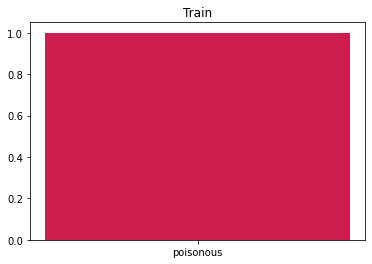

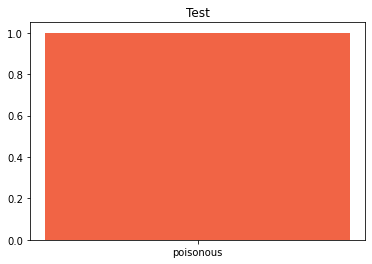

In [15]:
"""
Check distribution:
Before I start to run the model I want to make sure the distribution of the poisonos data. The data seems
to be equally distributed over the train and test sets.
"""
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color='#CD1C4E')
plt.title('Train')
plt.show()

plt.bar(Counter(y_test).keys(), Counter(y_test).values(), color='#F16445')
plt.title('Test')
plt.show()

## 1. Logistic regression

In [16]:
"""
Logistic regression: 
Logistic regression is appropriate to use when the dependent variable is binary. As can be seen in the scatterplots,
most of the time this is the case. Therefor I suspect this model will work well on the data that I provide.

Results:
- The model has an accuracy of 0.958
- The model has a precicion of 0.97
- The model has a recall of 0.95
- The model has a f1-score of 0.96

These are all considered good scores and therefor I can say this model performs pretty good on the mushrooms data,
as was already expected.
"""

# initialize the model
log_model = LogisticRegression(random_state=0)

# fit the model on the train data
log_model.fit(X_train, y_train)

# calculate accuracy score on train data
log_score_train = log_model.score(X_train, y_train)
print(f'Accuracy of logistic regression on train set {log_score_train:.3f}')

# calculate accuracy score on test data
log_score_test = log_model.score(X_test, y_test)
print(f'Accuracy of logistic regression on test set {log_score_test:.3f}')
print('')

# predict the values and evaluate with precision, recall and f1 
y_pred = log_model.predict(X_test)
evaluate(y_test, y_pred, X_test, log_model)


Accuracy of logistic regression on train set 0.956
Accuracy of logistic regression on test set 0.958

[[1227   39]
 [  64 1107]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1266
           1       0.97      0.95      0.96      1171

    accuracy                           0.96      2437
   macro avg       0.96      0.96      0.96      2437
weighted avg       0.96      0.96      0.96      2437



test  acc: 0.9577349199835864
train acc: 0.955584872471416


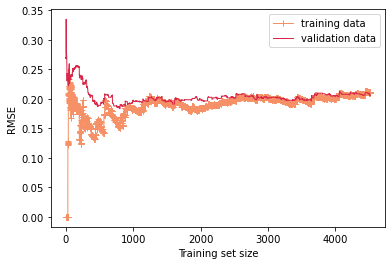

In [17]:
"""
Running this plot might take several minutes and thus commented out to save time to run the entire notebook.
The image is added to the github repo.

Results:
You see that the RMSE score lowers over the whole course of increasing the training set but there is a slight 'hiccup'
around the size 200 for the training set. This might be the point where it starts to overfit.
"""
plot_learning_curves(log_model, X_train, y_train, X_test, y_test)

## 2. Decision Tree

In [18]:
"""
Decision tree:
A decision is appropriate to use when you have clear boundaries within your data; you have categorical data.
It will probably not work that well because decision trees work with a cutoff point on integers and in this dataset,
even though I encoded it with integers, the data is not organized in a certain way. So for example the sizes and colors
do not go up in scale (e.g. from light to dar or from small to large). Therefor there can probably not be much to say 
about the decision tree and the decisions it has made.

Results:
- The model has for all scores 1.0 which is not good. This is probably because of the reasoning above.
- A precision of 1.0 means you have a lot of false negatives; which is not what you want.
- A recall of 1.0 means you will guess everything correct but the precision will fail and thus 
  you will have many false positives.
"""

# initialize the model
tree_model = DecisionTreeClassifier(random_state=0)

# fit the model on the train data
tree_model.fit(X_train, y_train)

# calculate accuracy score on train data
tree_score_train = tree_model.score(X_train, y_train)
print(f'Accuracy of decision tree on train set {tree_score_train:.3f}')

# calculate accuracy score on test data
tree_score_test = tree_model.score(X_test, y_test)
print(f'Accuracy of decision tree on test set {tree_score_test:.3f}')
print('')
# predict the values and evaluate with precision, recall and f1 
y_pred = tree_model.predict(X_test)
evaluate(y_test, y_pred, X_test, tree_model)

Accuracy of decision tree on train set 1.000
Accuracy of decision tree on test set 1.000

[[1266    0]
 [   0 1171]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1266
           1       1.00      1.00      1.00      1171

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



test  acc: 1.0
train acc: 1.0


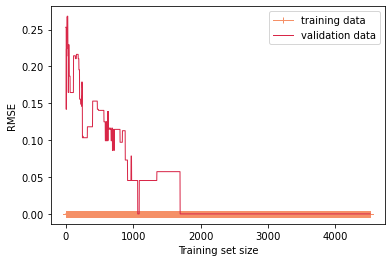

In [19]:
"""
Running this plot might take several minutes and thus commented out to save time to run the entire notebook.
The image is added to the github repo.

Results:
What you see here is that the model seems to be perfect after a certain training size for which I already explained 
above, this is not really 'perfect' as you want it. 
"""
plot_learning_curves(tree_model, X_train, y_train, X_test, y_test)

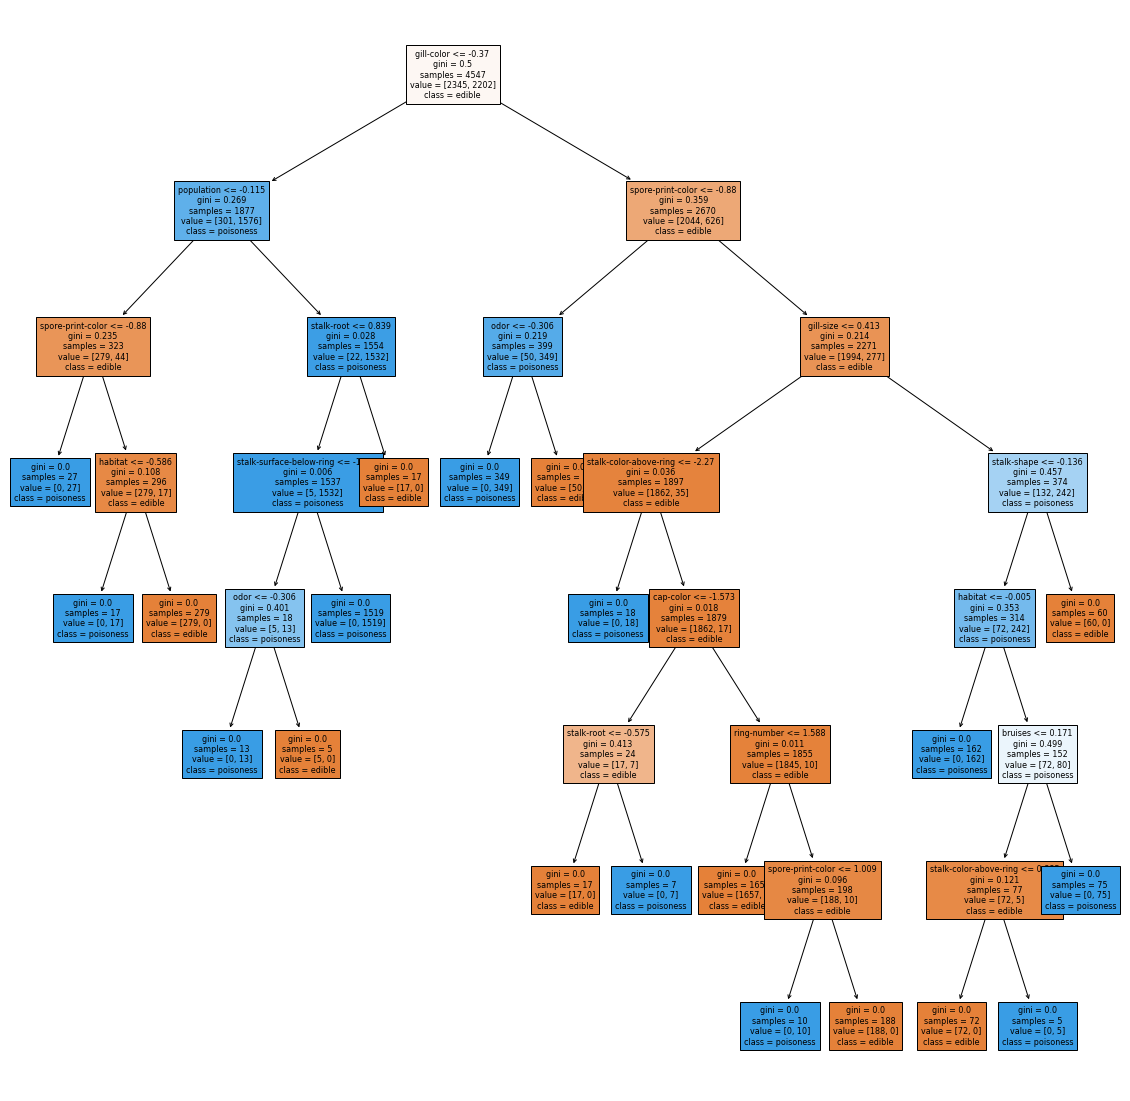

In [20]:
"""
Visualizing the tree:
To get better insight in what is actually happening within the decision tree algorithm it is best to plot 
the tree itself. It is also saved to your location to be able to zoom in.

Results:
There is not much to say about this as the categories (e.g. color) are not organized in a certain way. For example
if the colors (gill-color) had been organized from light to dark it could have been argued that possibly a darker
color tends to have a larger possibility of being poisonous.  
"""

plt.figure(figsize=(20, 20))
tree.plot_tree(tree_model,filled=True,
              feature_names=mushrooms.columns[1:],
              class_names=['edible', 'poisoness'],
              fontsize=8)  
plt.savefig('mushrooms_tree.png',format='png')

## 3. SVM

In [21]:
"""
SVM
Support vector machine (classification) is to be used when you have multiclass data.
This model will not work well because it wants to have a sort of scattered around data structure in which it can 
plot a line through and decide which data point belongs to a certain class. In this case, the data is mostly binary
and not scattered around (as can be seen in the scatterplots), therefor I indicate that this model will not perform 
that good.

Results:
- The model has for all scores 1.0 which is not good. This is probably because of the reasoning above.
- A precision of 1.0 means you have a lot of false negatives; which is not what you want
- A recall of 1.0 means you will guess everything correct but the precision will fail and thus 
  you will have many false positives.
"""

# initialize the model
svm_model = SVC(kernel='rbf', random_state=0)

# fit the model on the train data
svm_model.fit(X_train, y_train)

# calculate accuracy score on train data
svm_score_train = svm_model.score(X_train, y_train)
print(f'Acc of svm on train set {svm_score_train:.3f}')

# calculate accuracy score on test data
svm_score_test = svm_model.score(X_test, y_test)
print(f'Acc of svm on test set {svm_score_test:.3f}')
print('')

# predict the values and evaluate with precision, recall and f1 
y_pred = svm_model.predict(X_test)
evaluate(y_test, y_pred, X_test, svm_model)

Acc of svm on train set 1.000
Acc of svm on test set 1.000

[[1266    0]
 [   0 1171]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1266
           1       1.00      1.00      1.00      1171

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



test  acc: 1.0
train acc: 1.0


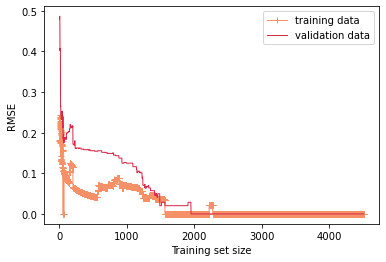

In [22]:
"""
Running this plot might take several minutes and thus commented out to save time to run the entire notebook.
The image is added to the github repo.

Results:
The RMSE score goes down gradually. There is one point for which you can say there it starts to overfit, around the 
size 200 but this is really a tiny hiccup and therefor in my opinion I cannot conclude that something special is 
happening here. After/around a training set size of 2000 the model seems to behaving perfectly which is also not
what you want as this indicates that the model is not working well (which can also be seen in the scores above).
"""
plot_learning_curves(svm_model, X_train, y_train, X_test, y_test)

## 4. Naive Bayes

In [23]:
"""
Naive Bayes
Naive bayes is to be used when you have multiclass data. The naive Bayes classifiers assumes that the effect of a
particular feature in a class is independent of other features (https://tinyurl.com/46wze34j). As can be seen in the
correlation heatmap, there is no high correlation happening within all the features of this dataset. Therefor this
algorithm might be working well with this data.


Results:
- The model has an accuracy of 0.92
- The model has a precision of 0.91
- The model has a recall of 0.92
- The model has a f1-score of 0.92

These are all good scores and therefor I can say this is the second model that works good on the mushroom dataset. This 
is probably due to the reasoning given above. There are no features strongly correlated and that is what works well
with the Naive Bayes model.
"""

# initialize the model
naive_model = GaussianNB()

# fit the model on the train data
naive_model.fit(X_train, y_train)

# calculate accuracy score on train data
naive_score_train = naive_model.score(X_train, y_train)
print(f'Accuracy of naive bayes on train set {naive_score_train:.3f}')

# calculate accuracy score on test data
naive_score_test = naive_model.score(X_test, y_test)
print(f'Accuracy of naive bayes on test set {naive_score_test:.3f}')
print('')

# predict the values and evaluate with precision, recall and f1 
y_pred = naive_model.predict(X_test)
evaluate(y_test, y_pred, X_test, naive_model)

Accuracy of naive bayes on train set 0.918
Accuracy of naive bayes on test set 0.920

[[1164  102]
 [  93 1078]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1266
           1       0.91      0.92      0.92      1171

    accuracy                           0.92      2437
   macro avg       0.92      0.92      0.92      2437
weighted avg       0.92      0.92      0.92      2437



test  acc: 0.9199835863766926
train acc: 0.9175461741424802


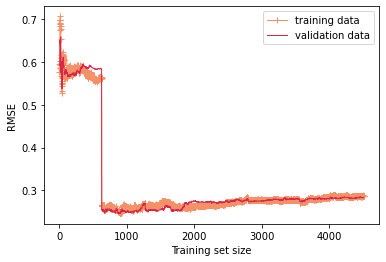

In [24]:
"""
Running this plot might take several minutes and thus commented out to save time to run the entire notebook.
The image is added to the github repo.

Results:
In this plot I can clearly distinguish the point where the model starts to overfit. Around the size of 700/800 the RMSE
score drops in one straight line to down below and then stays there. This is the point where the size should be cut off.
"""
plot_learning_curves(naive_model, X_train, y_train, X_test, y_test)

## 5. Random forest

In [25]:
"""
Random forest.
A random forest is appropriate to use when you have clear boundaries within your data; you have categorical data.
The random forest algorithm is based on the decision tree. The random forest runs a bunch of decision trees and takes the
best result. As I explained above for the decision tree, this type of model will probably not work well with the
mushroom dataset because the data is not organized in a proper manner (not from light to dark, small to big etc.) which
is logical as there is not a structured way to organize the shape of a mushroom for example.

Results:
- The model has for all scores 1.0 which is not good. This is probably because of the reasoning above.
- A precision of 1.0 means you have a lot of false negatives; which is not what you want
- A recall of 1.0 means you will guess everything correct but the precision will fail and thus 
  you will have many false positives.
"""

# initialize the model
forest_model = RandomForestClassifier(n_estimators = 10, random_state=0)

# fit the model on the train data
forest_model.fit(X_train, y_train)

# calculate accuracy score on train data
forest_score_train = forest_model.score(X_train, y_train)
print(f'Acc of random forest on train set {forest_score_train:.3f}')

# calculate accuracy score on test data
forest_score_test = forest_model.score(X_test, y_test)
print(f'Acc of random forest on test set {forest_score_test:.3f}')
print('')

# predict the values and evaluate with precision, recall and f1 
y_pred = forest_model.predict(X_test)
evaluate(y_test, y_pred, X_test, forest_model)

Acc of random forest on train set 1.000
Acc of random forest on test set 1.000

[[1266    0]
 [   0 1171]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1266
           1       1.00      1.00      1.00      1171

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



test  acc: 1.0
train acc: 1.0


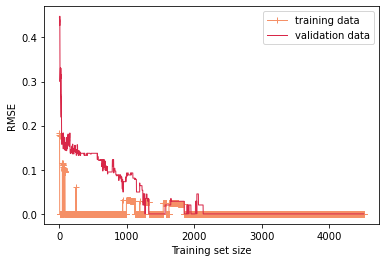

In [26]:
"""
Running this plot might take several minutes and thus commented out to save time to run the entire notebook.
The image is added to the github repo.

Results:
What you see here is that the model seems to be perfect after a certain training size (2000) for which I already explained 
above, this is not really 'perfect' as you want it. 
"""
plot_learning_curves(forest_model, X_train, y_train, X_test, y_test)